## Linear Regression 
This is a linear model, it is one of the best statistical models that studies the relationaship between the dependent variable(y) and the set of  independent variales (x)

Two types : 1. Simple linear regresssion(1d input)  and 2. Multiple linear regression(n-d  input)

Linear regression creates  a straight line plot in betweeen the data points that give the least distance from the reression line to data points. 
Equation : 

        Y' = bX+A  
                where, b--> slope and A--> intercept

        b = r*(Sx / Sy)
                where, r --> correlation betweeen X and Y
                  Sx --> standard deviation of X
                  Sy --> standard deviation of Y

This project demonstrates a simple implementation of **Linear Regression** using the classic **Iris dataset**. The goal is to model the relationship between **petal length** (input feature) and **petal width** (target variable) and evaluate how well a linear model can capture this relationship.


In [ ]:
# Loading iris data into data frames using pandas

import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data= iris.data, columns=iris.feature_names)

                   sepal length (cm)  ...  petal width (cm)
sepal length (cm)           1.000000  ...          0.817941
sepal width (cm)           -0.117570  ...         -0.366126
petal length (cm)           0.871754  ...          0.962865
petal width (cm)            0.817941  ...          1.000000

[4 rows x 4 columns]
       sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
count         150.000000        150.000000         150.000000        150.000000
mean            5.843333          3.057333           3.758000          1.199333
std             0.828066          0.435866           1.765298          0.762238
min             4.300000          2.000000           1.000000          0.100000
25%             5.100000          2.800000           1.600000          0.300000
50%             5.800000          3.000000           4.350000          1.300000
75%             6.400000          3.300000           5.100000          1.800000
max             7.900000          4.40

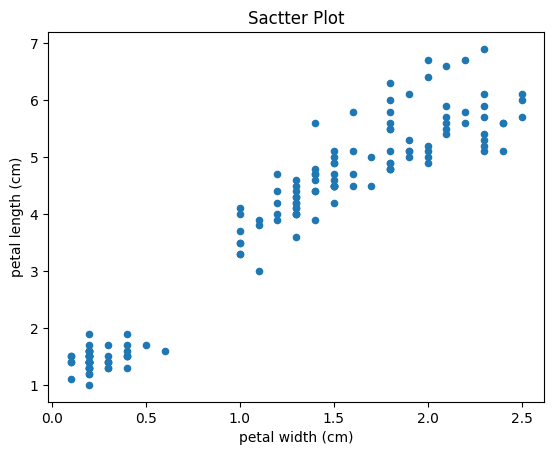

In [ ]:
#EDA --> Exploratory Data Analysis 

df.head()
df.shape
df.plot.scatter(x="petal width (cm)", y="petal length (cm)",title = "Sactter Plot")
print(df.corr())
print(df.describe())


In [ ]:
# Pre processing 

y = df["petal width (cm)"].values.reshape(-1,1)
x = df["petal length (cm)"].values.reshape(-1,1)

# splitting data in train and test 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
#print(x_train)  #gives the data to be trained
#print(y_train)   #gives the data to be trained

In [ ]:
# Training model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)


[-0.33415675]
[[0.40812033]]


In [ ]:
# Predictions 

score = regressor.predict([[7.5]])  #expects 2d array
print(score)  # if the petal width(x) is 7.5 what can be the petal length(y) i.e, x-->y ?

[[2.72674572]]


In [ ]:
# custom function
def calc(slope, intercept, val):
    return slope*val + intercept  #y=bx+c


In [ ]:
score = calc(regressor.coef_, regressor.intercept_, 7.5)
print(score)

# we can see that that the predicted and custom fucntion val is same hence we can say that the prediction is correct

[[2.72674572]]


In [ ]:
# prediction using test data set
y_pred = regressor.predict(x_test) # storing our test prediction data into y_pred var
df_pred = pd.DataFrame({"Actual ":y_test.squeeze(),"Predicted ":y_pred.squeeze()})
print(df_pred)

    Actual   Predicted 
0       1.9    1.706445
1       0.2    0.237212
2       2.4    1.951317
3       1.6    2.032941
4       1.0    1.094264
5       2.4    1.951317
6       1.5    1.665633
7       1.3    1.379949
8       0.2    0.278024
9       1.2    1.298325
10      1.3    1.379949
11      0.6    0.318836
12      1.3    1.135076
13      2.5    2.114565
14      2.3    1.992129
15      0.3    0.359648
16      1.0    1.298325
17      2.5    2.155377
18      0.4    0.278024
19      0.2    0.278024
20      1.1    1.257513
21      0.2    0.441272
22      1.2    1.584009
23      0.1    0.237212
24      1.5    1.543197
25      1.2    1.461573
26      0.3    0.237212
27      0.1    0.278024
28      2.1    1.910505
29      0.2    0.278024


In [ ]:
# Evaluating the model

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np 

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mae)
print(mse)
print(rmse)


0.19774367654660654
0.05576303264386442
0.2361419756076086
